# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Data task
The task is to identify and quantify the key factors that influence the price of used cars. This involves analyzing the relationships between car attributes (e.g., manufacturer, year, mileage, fuel type, condition) and the target variable, price. The goal is to build a predictive model to estimate car prices based on these features, evaluate the impact of each feature using statistical and machine learning techniques, and provide actionable insights to optimize inventory and pricing strategies for the dealership.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
import pandas as pd

#### 1. Read in the vehicles.csv file.


In [ ]:
vehicles_df = pd.read_csv('data/vehicles.csv')

In [ ]:
vehicles_df.head()

#### 2. Investigate the dataset for missing or problematic data


In [72]:
# checking counts and data type for each column
print(vehicles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [74]:
# data count
print(vehicles_df.shape)

(426880, 18)


In [80]:
# checking for the presence of null values
missing_vals = vehicles_df.isnull().sum()

print(type(missing_vals))
missing_vals


<class 'pandas.core.series.Series'>
id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


In [84]:
# checking the percentage of the presence of null values
print((vehicles_df.isnull().sum() / len(vehicles_df)) * 100)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


In [86]:
# lets get the list of numerical and categorical columns
column_names = vehicles_df.columns.tolist()

column_names

['id',
 'region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [94]:
# Summary for numerical columns
print(vehicles_df.describe())  


                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [96]:
# Summary for categorical columns
print(vehicles_df.describe(include=['object']))  

          region manufacturer   model condition    cylinders    fuel  \
count     426880       409234  421603    252776       249202  423867   
unique       404           42   29649         6            8       5   
top     columbus         ford   f-150      good  6 cylinders     gas   
freq        3608        70985    8009    121456        94169  356209   

       title_status transmission                VIN   drive       size  \
count        418638       424324             265838  296313     120519   
unique            6            3             118246       3          4   
top           clean    automatic  1FMJU1JT1HEA52352     4wd  full-size   
freq         405117       336524                261  131904      63465   

          type paint_color   state  
count   334022      296677  426880  
unique      13          12      51  
top      sedan       white      ca  
freq     87056       79285   50614  


In [108]:
# split the columns into numerical and categorical columns
numerical_columns = vehicles_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = vehicles_df.select_dtypes(include=['object']).columns
print('Numerical ---> ')
print(numerical_columns)
print('Categorical ---> ')
print(categorical_columns)

Numerical ---> 
Index(['id', 'price', 'year', 'odometer'], dtype='object')
Categorical ---> 
Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Data Cleaning

1. Based on the previous data exploration phase, figured out that we may not need these columns for the analysis 
 `'id', 'VIN', 'region', 'size'`.
2. Impute 'year' with its median
3. Impute categorical features with mode
4. Remove rows with missing 'price'
5, Remove rows with 'price' < 1000 or 'price' > 150000 (outliers)
6. Remove rows with 'year' < 1960 or 'year' > 2024 (outliers)
7. Remove rows with 'odometer' > 500000
   

In [117]:
vehicles_data_cleaned = vehicles_df.drop(columns=['id', 'VIN', 'region', 'size'])

vehicles_data_cleaned['year'] = vehicles_data_cleaned['year'].fillna(vehicles_data_cleaned['year'].median())
vehicles_data_cleaned['year'] = vehicles_data_cleaned['year'].astype(int)

categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
for feature in categorical_features:
    vehicles_data_cleaned[feature] = vehicles_data_cleaned[feature].fillna(vehicles_data_cleaned[feature].mode()[0])

vehicles_data_cleaned = vehicles_data_cleaned[(vehicles_data_cleaned['price'] >= 1000) & (vehicles_data_cleaned['price'] <= 150000)]

vehicles_data_cleaned = vehicles_data_cleaned[(vehicles_data_cleaned['year'] >= 1960) & (vehicles_data_cleaned['year'] <= 2024)]

vehicles_data_cleaned = vehicles_data_cleaned[(vehicles_data_cleaned['odometer'].notnull()) & (vehicles_data_cleaned['odometer'] <= 500000)]

In [119]:
# Display the final set of data after cleaning
print(vehicles_data_cleaned.shape),
print(vehicles_data_cleaned.info())
print(vehicles_data_cleaned.isnull().sum())
print(vehicles_data_cleaned.describe())
print(vehicles_data_cleaned.describe(include=['object']))
print(vehicles_data_cleaned.head())

(375016, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 375016 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         375016 non-null  int64  
 1   year          375016 non-null  int64  
 2   manufacturer  375016 non-null  object 
 3   model         375016 non-null  object 
 4   condition     375016 non-null  object 
 5   cylinders     375016 non-null  object 
 6   fuel          375016 non-null  object 
 7   odometer      375016 non-null  float64
 8   title_status  375016 non-null  object 
 9   transmission  375016 non-null  object 
 10  drive         375016 non-null  object 
 11  type          375016 non-null  object 
 12  paint_color   375016 non-null  object 
 13  state         375016 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 42.9+ MB
None
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0

#### Exploratory Data Analysis (EDA)

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(style="whitegrid", palette="bright", context="talk")



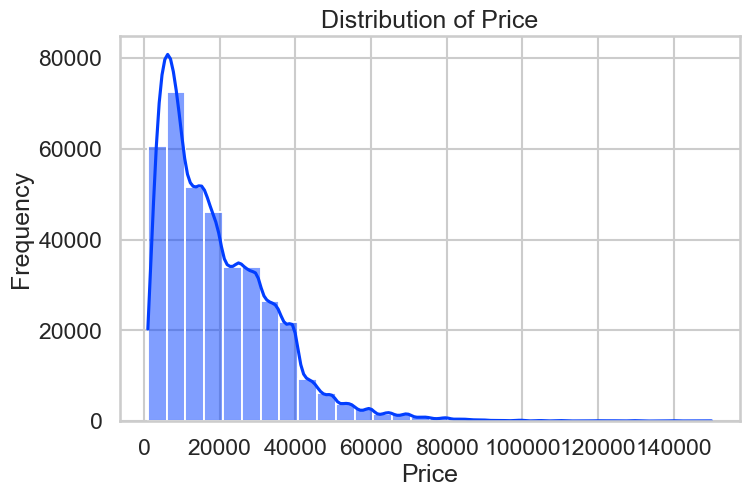

In [148]:
# Distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(vehicles_data_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

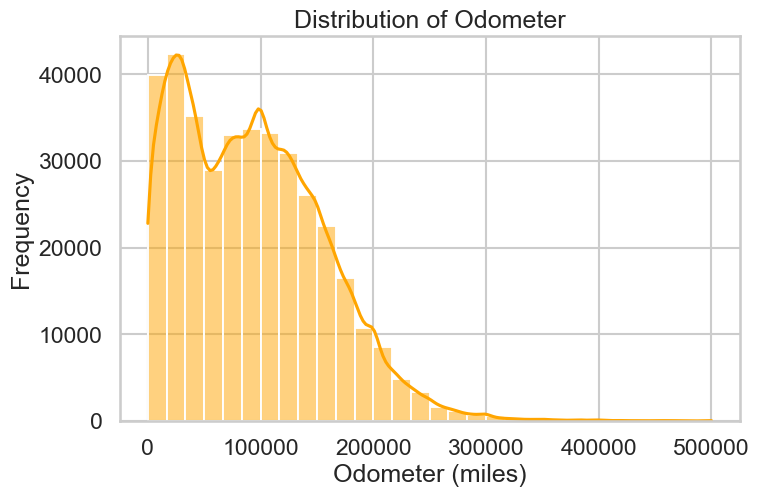

In [150]:
# Distribution of Odometer
plt.figure(figsize=(8, 5))
sns.histplot(vehicles_data_cleaned['odometer'], bins=30, kde=True, color="orange")
plt.title('Distribution of Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.show()


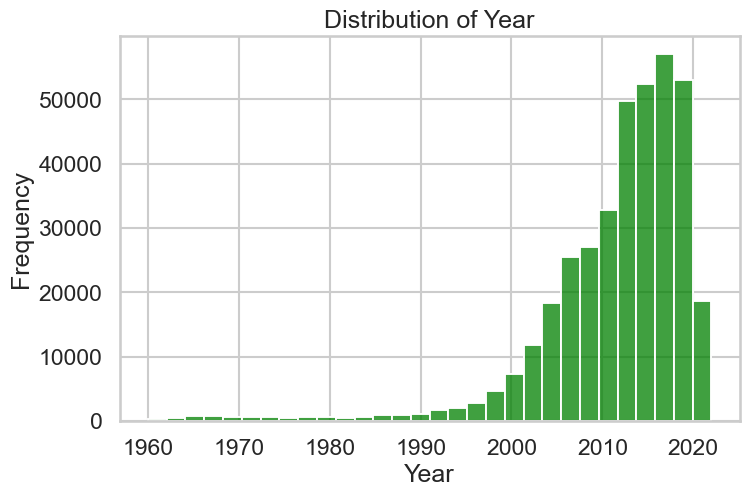

In [152]:
# Distribution of Year
plt.figure(figsize=(8, 5))
sns.histplot(vehicles_data_cleaned['year'], bins=30, kde=False, color="green")
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

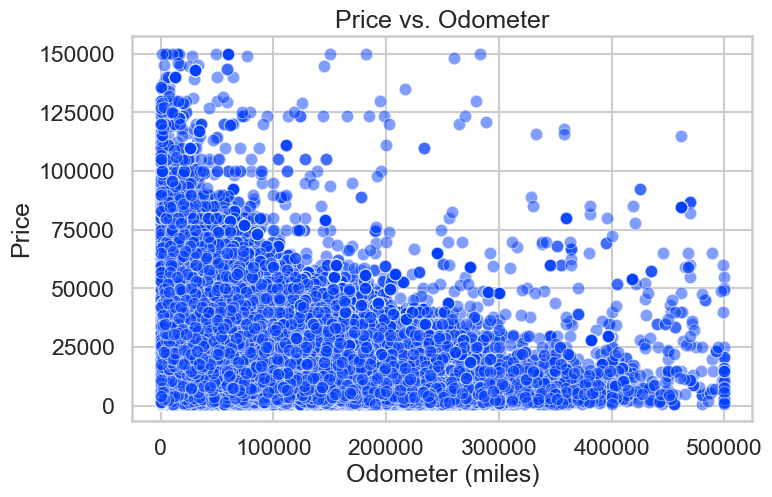

In [154]:
# Price vs Odometer
plt.figure(figsize=(8, 5))
sns.scatterplot(data=vehicles_data_cleaned, x='odometer', y='price', alpha=0.5)
plt.title('Price vs. Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price')
plt.show()

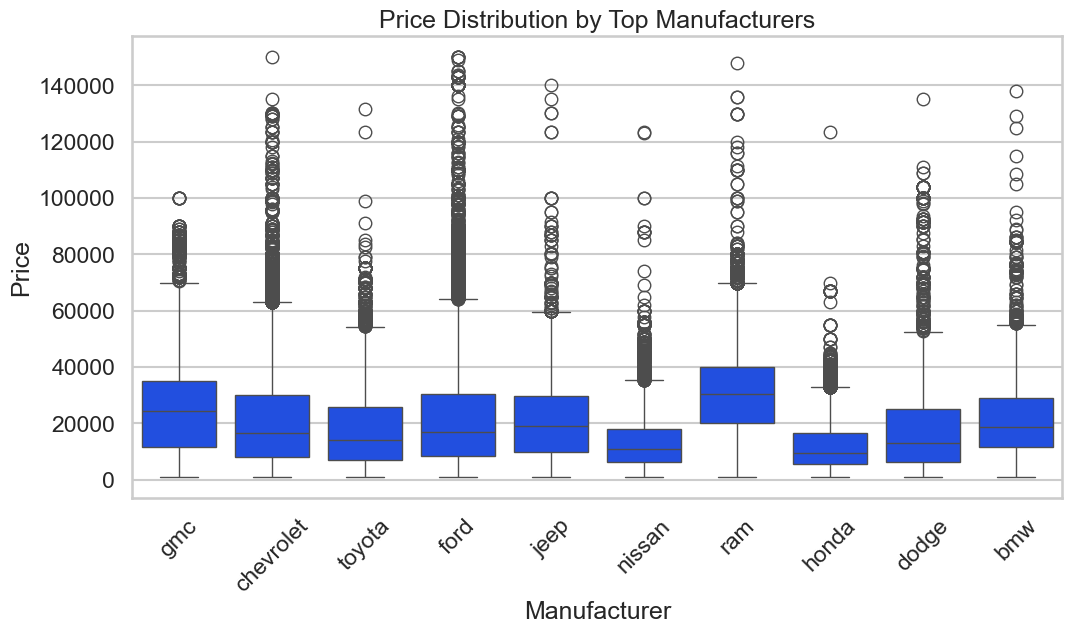

In [156]:
# Price distribution by Manufacturer
plt.figure(figsize=(12, 6))
top_manufacturers = vehicles_data_cleaned['manufacturer'].value_counts().head(10).index
sns.boxplot(data=vehicles_data_cleaned[vehicles_data_cleaned['manufacturer'].isin(top_manufacturers)], 
            x='manufacturer', y='price')
plt.title('Price Distribution by Top Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

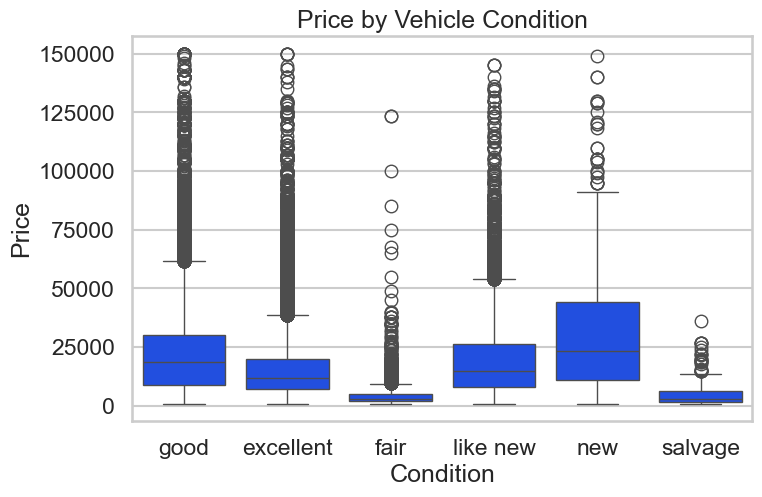

In [158]:
# Price by Condition
plt.figure(figsize=(8, 5))
sns.boxplot(data=vehicles_data_cleaned, x='condition', y='price')
plt.title('Price by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

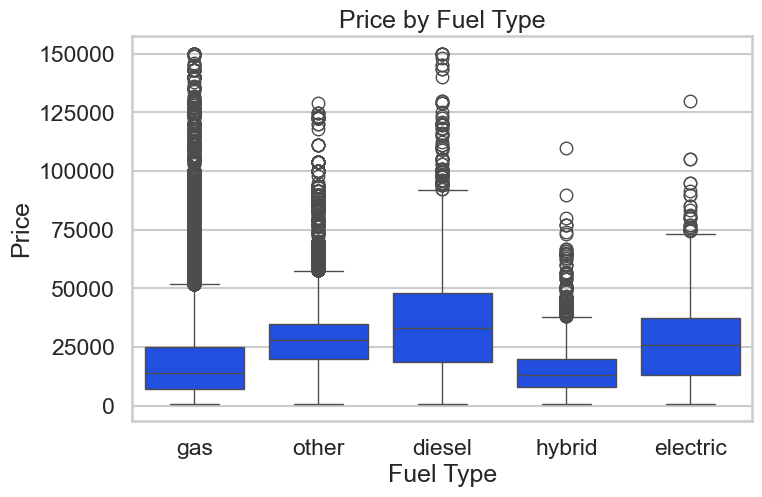

In [160]:
# Price distribution by fuel type
plt.figure(figsize=(8, 5))
sns.boxplot(data=vehicles_data_cleaned, x='fuel', y='price')
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

#### Analyze Correlations between key variables (price, year, odometer)

In [165]:
# Compute correlations between numerical features
correlation_matrix = vehicles_data_cleaned[['price', 'year', 'odometer']].corr()

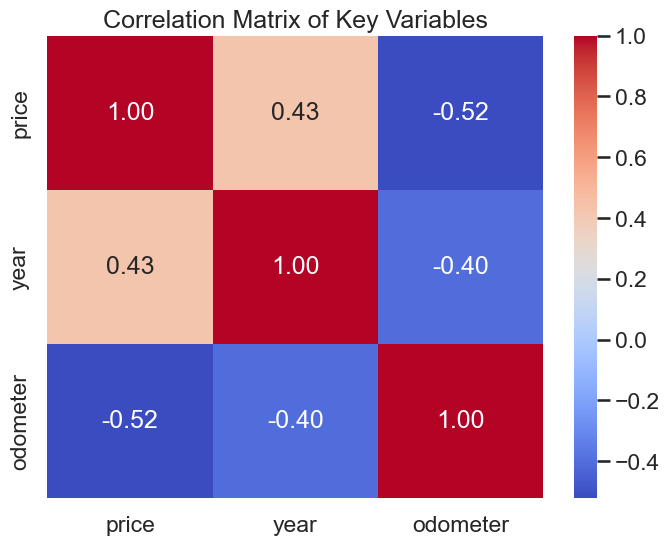

In [167]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Key Variables")
plt.show()

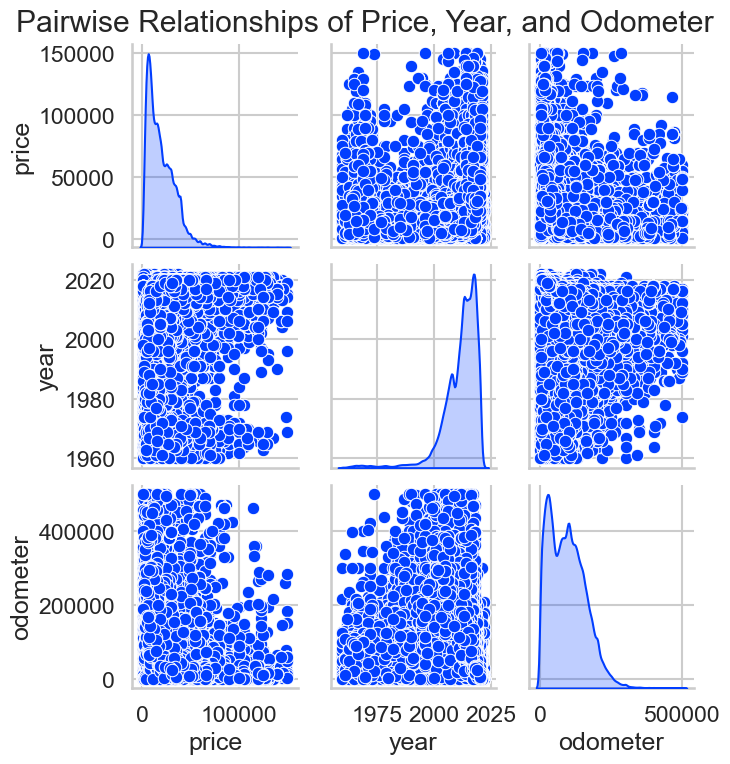

In [169]:
# Pairplot to visualize pairwise relationships
sns.pairplot(vehicles_data_cleaned[['price', 'year', 'odometer']], diag_kind='kde')
plt.suptitle("Pairwise Relationships of Price, Year, and Odometer", y=1.02)
plt.show()

#### Feature Engineering

In [ ]:
# Calculate a new feature called car's age
vehicles_data_cleaned['car_age'] = 2024 - vehicles_data_cleaned['year'] 

# Drop redundant features
vehicles_data_cleaned.drop(columns=['year'], inplace=True)

vehicles_data_cleaned.head()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Setup


In [181]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [187]:
# create label encoder for the columns ['manufacturer', 'model', 'cylinders', 'title_status', 'type', 'paint_color', 'state'] to 
# make  sure while training don't miss any value that is present only in test data

manufacturer_encoder = LabelEncoder().fit(vehicles_data_cleaned['manufacturer'])
model_encoder = LabelEncoder().fit(vehicles_data_cleaned['model'])
cylinders_encoder = LabelEncoder().fit(vehicles_data_cleaned['cylinders'])
title_status_encoder = LabelEncoder().fit(vehicles_data_cleaned['title_status'])
type_encoder = LabelEncoder().fit(vehicles_data_cleaned['type'])
paint_color_encoder = LabelEncoder().fit(vehicles_data_cleaned['paint_color'])
state_encoder = LabelEncoder().fit(vehicles_data_cleaned['state'])

# Define the column transformer
column_transformer = ColumnTransformer([
    ('hot_encoder', OneHotEncoder(drop='if_binary'), ['fuel', 'condition', 'drive', 'transmission']),
    ('manufacturer_encoder', OrdinalEncoder(categories=[manufacturer_encoder.classes_]), ['manufacturer']),
    ('model_encoder', OrdinalEncoder(categories=[model_encoder.classes_]), ['model']),
    ('cylinders_encoder', OrdinalEncoder(categories=[cylinders_encoder.classes_]), ['cylinders']),
    ('title_status_encoder', OrdinalEncoder(categories=[title_status_encoder.classes_]), ['title_status']),
    ('type_encoder', OrdinalEncoder(categories=[type_encoder.classes_]), ['type']),
    ('paint_color_encoder', OrdinalEncoder(categories=[paint_color_encoder.classes_]), ['paint_color']),
    ('state_encoder', OrdinalEncoder(categories=[state_encoder.classes_]), ['state']),
    ('scaler', StandardScaler(), ['odometer', 'car_age'])
])


In [189]:
# Define features and target
X = vehicles_data_cleaned.drop(columns=['price'])
y = vehicles_data_cleaned['price']

# Split data into train and test sets to make sure results are reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   


#### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

Linear Regression RMSE: 10161.18


In [191]:
# Linear Regression
linear_model = Pipeline(steps=[('preprocessor', column_transformer), ('model', LinearRegression())])
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Linear Regression RMSE: {rmse_linear:.2f}")

Linear Regression RMSE: 10161.18


#### Ridge with Cross-Validation

In [195]:
from sklearn.linear_model import Ridge

In [ ]:
# Ridge Regression with Cross-Validation
ridge_model = Ridge()
ridge_params = {'model__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Pipeline(steps=[('preprocessor', column_transformer), ('model', Ridge())]), ridge_params)
ridge_grid.fit(X_train, y_train)

best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")
print(f"Best Ridge Model: {best_ridge_model}")

#### Lasso With Cross-Validation

In [214]:
from sklearn.linear_model import Lasso

In [ ]:
# Lasso Regression with Cross-Validation
lasso_params = {'model__alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Pipeline(steps=[('preprocessor', column_transformer), ('model', Lasso())]), lasso_params)
lasso_grid.fit(X_train, y_train)

best_lasso_model = lasso_grid.best_estimator_

y_pred_lasso = best_lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Lasso Regression RMSE: {rmse_lasso:.2f}")
print(f"Best Lasso Model: {best_lasso_model}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+12, tolerance: 5.184e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+12, tolerance: 5.205e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.153e+12, toler

#### Summary

In [210]:
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Summarize Results
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "RMSE": [rmse_linear, rmse_ridge, rmse_lasso],
    "MAE": [mean_absolute_error(y_test, y_pred_linear), mean_absolute_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_lasso)],
    "R2 Score": [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)],
    "Best Hyperparameters": ["N/A", ridge_grid.best_params_, lasso_grid.best_params_]
}

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)
print("Model Evaluation Results")
print(results_df)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Overall Insights

##### Performance Consistency: 
    All three models yield nearly identical RMSE, MAE, and R² scores, indicating the dataset's linearity and limited impact of regularization.


##### Metric Interpretation:

1. RMSE (Root Mean Squared Error): Indicates an average error of ~$10,161 in price predictions. Larger penalties for outliers.

2. MAE (Mean Absolute Error): Represents a more robust average error of ~$6,880, unaffected by outliers.

3. R² Score: Explains 53.2% of the variance in the target variable, leaving room for improvement
   
    All three models yield nearly identical RMSE, MAE, and R² scores, indicating the dataset's linearity and limited impact of regularization.


##### Conclusions

1. Linear Regression:
    Performs well without regularization and is suitable for deployment if simplicity is a priority.
2. Ridge Regression:
    Marginally outperforms Linear Regression in RMSE and MAE.
    The optimal alpha = 10 suggests mild regularization stabilizes predictions.
3. Lasso Regression:
    Similar to Ridge, with marginally better MAE.
    The optimal alpha = 0.1 indicates limited need for strong penalty terms.



##### Recommendations
    Model Choice: Ridge Regression is slightly better and may be preferred since stability is crucial.
    

In [43]:
#Relative importance of each feature in the model

In [ ]:
# plot the relative imporanace of features in ridge regression
importance = best_ridge_model.named_steps['model'].coef_
feature_names = column_transformer.get_feature_names_out()

# clean up the feature names
feature_names = [name.replace('hot_encoder__', '') for name in feature_names]
feature_names = [name.replace('scaler__', '') for name in feature_names]
feature_names = [name.replace('manufacturer_encoder__', 'manufacturer_') for name in feature_names]
feature_names = [name.replace('model_encoder__', 'model_') for name in feature_names]
feature_names = [name.replace('cylinders_encoder__', 'cylinders_') for name in feature_names]
feature_names = [name.replace('title_status_encoder__', 'title_status_') for name in feature_names]
feature_names = [name.replace('type_encoder__', 'type_') for name in feature_names]
feature_names = [name.replace('paint_color_encoder__', 'paint_color_') for name in feature_names]


# zip feature names and importance
feature_importance = dict(zip(feature_names, importance))

# sort the feature_importance based on the importance
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True))
sorted_feature_importance

In [ ]:
# Generate a plot of the feature importances

coeff_df = pd.DataFrame(list(feature_importance.items()), columns=["Feature", "Coefficient"])
coeff_df["Coefficient"] = coeff_df["Coefficient"].astype(float)
coeff_df = coeff_df.sort_values(by="Coefficient", ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(data=coeff_df, y="Feature", x="Coefficient", legend=False)
plt.title("Feature Importance Based on Coefficients")
plt.xlabel("Coefficient Value (Impact on Price)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

#### Recommendations for Deployment

##### Actionable Insights:

1. Stock Diesel and 4WD Vehicles:
    Higher margins for diesel cars and 4WD capabilities due to strong consumer demand.
2. Avoid Salvage Vehicles:
    Salvage condition reduces resale value significantly.
3. Emphasize Newer Models with Low Mileage:
    Target cars with fewer miles and newer manufacturing years to maximize profit.

                  
##### Model Deployment Strategy:

###### Use the Ridge Regression model to:
    1. Predict prices dynamically based on car features.
    2. Provide sales teams with data-driven pricing recommendations.